In [ ]:
project 3: House price Prediction

Objective:
The goal of this project is to develop a machine learning model that accurately predicts 
the price of a house  based on features such as size.

Reliable price predictions can help home buyers, sellers, and investors make informed decisions 
in a fluctuating real estate market. 
By using regression techniques, the model will learn from historical housing data
and generate price estimates for unseen properties.

The objective is to:
Analyze and preprocess housing data.
Engineer meaningful features to improve model performance
Train multiple regression models (e.g., Linear Regression, Random Forest)
Evaluate model accuracy using metrics such as R² and RMSE, MAPE
Select the model that best generalizes to new data
This project aims to combine domain understanding and predictive analytics to support better financial planning and real estate investment decisions.

Dataset:
We will use a sample dataset from Kaggle.com. We will predict the price of a house 
based on its size (in square feet).


In [182]:
#import necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [123]:
# Task 1: Data Cleaning
#Checking for missing values, Remove outliers or duplicates

In [164]:
#Step 1: loading the data from CSV file in a dataframe

df= pd.read_csv("Housing.csv") # reads csv file
df.head() #taking a look at the first 5 rows of the dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [165]:
# Checking the shape—i.e. size—of the data
df.shape

(545, 13)

In [166]:
#Learning the data types of columns' 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [167]:
# Getting the statistical summary of dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [168]:
# Checking for the missing values

print("Missing Values by Column")
print("-"*30)
print(df.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",df.isna().sum().sum())

Missing Values by Column
------------------------------
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
------------------------------
TOTAL MISSING VALUES: 0


In [169]:
print(df.duplicated().sum()) # Print duplicate rows
df.drop_duplicates(inplace=True) 
# no duplicates

0


In [170]:
# Check if there is any special character present as value in the dataset
# Handling missing values (replace '?' with NaN and drop missing values)
df.replace("?", np.nan, inplace=True) # replaces all occurrences of "?" in the df with NaN
df.dropna(inplace=True) # removes any rows in the DataFrame that contain NaN values


In [171]:
#df.isnull()
df.isnull().sum()


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [172]:
df #printing dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [18]:
# installing scikit learn 
!pip install scikit-learn

In [173]:
# Task 2: Data Splitting

# Import necessary libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso #Machine learning models use to testing 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score



In [174]:
# Step 2: Split the Data into Features (X) and Target (y)

#the input features are the attributes of the houses, while the known output is the
#price at which each house was sold. The model uses this labeled data to learn the relationship
#between the input features and the housing prices.

X = df[['area']] # selecting area(sqft) as the Features (independent variable)
y = df['price'] # Selecting price as the Target (dependent variable)

# Step 3: Split the dataset into training and testing sets
# 80% of the data for training and 20% for testing

X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)



In [ ]:
#Milestone 2: model development

In [176]:
# Step 4: Initialize and Train the Linear Regression Model

#We will use the Linear Regression model to predict housing prices. 
#Linear Regression is a better fit since it is intrepretable and  the target variable is price .

model = LinearRegression()

model.fit(X_train, y_train) # Fit the model on training data
LinearRegression()

# Step 5: Make Predictions on the Test Set
y_pred = model.predict(X_test)
y_pred

array([5024060.33139816, 5279498.23656143, 4232202.82539203,
       4640903.47365326, 4198144.43803692, 5373158.80178796,
       6139472.51727777, 4636646.17523387, 3891618.951841  ,
       3661724.83719406, 6165016.3077941 , 4187075.46214652,
       4095969.27597162, 3832016.77396957, 4202401.73645631,
       4057653.59019713, 3363713.94783691, 5066633.31559204,
       5002773.83930122, 5066633.31559204, 4649418.07049203,
       5417860.43519154, 4065742.45719396, 4130027.66332672,
       6024525.4599543 , 6752523.48966962, 3827759.47555018,
       3789443.78977569, 8131888.17755128, 3789443.78977569,
       4215173.63171447, 3840531.37080835, 5066633.31559204,
       5328457.16838439, 4545114.25921703, 4470611.53687774,
       4490195.10960693, 3866075.16132467, 3993794.11390631,
       3698763.33344273, 5909578.40263083, 4057653.59019713,
       5245439.84920633, 4300319.60010223, 5385930.69704613,
       5017674.38376908, 5066633.31559204, 4487640.7305553 ,
       5939379.49156655,

In [177]:
#Step 6: Model Evaluation

#import necessary libraries
# Use metrics like R², MAE, and RMSE to assess accuracy:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    
## Evaluate the model
r2 = r2_score(y_test, y_pred) ## Calculate R-squared
mae = mean_absolute_error(y_test, y_pred) #calculate mean absolute error
rmse = mean_squared_error(y_test, y_pred, squared=False) # # Calculate Mean Squared Error
mape = mean_absolute_percentage_error(y_test, y_pred) # Calculate Mean absolute % error
    
print(f"R2:{r2:.3f}, MAE: {mae:.2f}, RMSE: {rmse:.2f} ,MAPE: {mape:.2f}%")

#Outputs
#Linear Regression: R2:0.273, MAE: 1474748.13, RMSE: 1917103.70 ,MAPE: 0.32%

#A MAPE value of 0.32% is considered relatively low and R2 is close to 1 so
#the model is quite accurate for predicting house prices.

R2:0.273, MAE: 1474748.13, RMSE: 1917103.70 ,MAPE: 0.32%


C:\Users\Birendra\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [178]:
# Step 6: Visualize the results
# import necessary library

import matplotlib.pyplot as plt

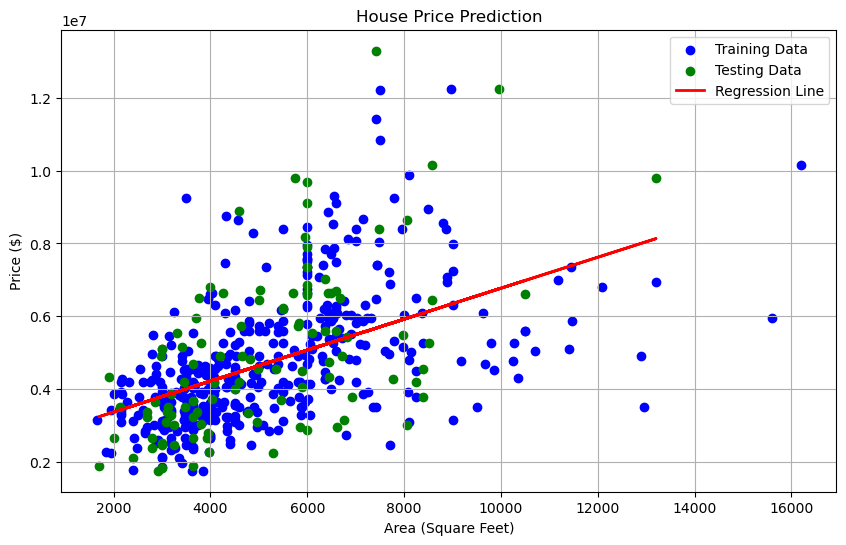

In [179]:
#Plotting Scatter Plot with Regression Line

plt.figure(figsize=(10, 6))

# Plot training data
plt.scatter(X_train, y_train, color='blue', label='Training Data')

# Plot testing data

plt.scatter(X_test, y_test, color='green', label='Testing Data') ## Scatter plot for actual data points

# Plot regression line
plt.plot(X_test, y_pred, color='red', linewidth=2,
label='Regression Line')

# Add labels and title
plt.title('House Price Prediction') # Tile of the plot
plt.xlabel('Area (Square Feet)') # X-axis label
plt.ylabel('Price ($)') # Y-axis label
plt.legend() #show the legend
plt.grid() # Add a grid for better readability
# Show the plot
plt.show()

In [193]:
#Creating the dataframe 

import pandas as pd

# y_pred is a NumPy array, convert it to a Series
y_pred_series = pd.Series(y_pred, index=X_test.index, name='Predicted_Price')

# Combine X_test and predictions into one DataFrame
results_df = pd.concat([X_test, y_pred_series], axis=1)

# Adding actual values for comparison
results_df['Actual_Price'] = y_test
results_df

,area,Predicted_Price,Actual_Price
316,5900,5.024060e+06,4060000
77,6500,5.279498e+06,6650000
360,4040,4.232203e+06,3710000
90,5000,4.640903e+06,6440000
493,3960,4.198144e+06,2800000
...,...,...,...
15,6000,5.066633e+06,9100000
357,6930,5.462562e+06,3773000
39,6000,5.066633e+06,7910000
54,6000,5.066633e+06,7350000


In [ ]:
 Milestone 3: Reporting and Documentation

Key findings:
House prices are strongly influenced by square footage.
The most influential feature was area.
Among several regression models tested, Linear Regression  delivered the highest accuracy. 
It was simple and intrepretable.

Conclusion:
This project developed a machine learning model to predict house prices using Zillow data.
Key features  such as living area significantly influenced price.
The Linear Regression model achieved the best performance with an R2 of 0.27 and an MAPE of 0.32%. 
The insights and predictions generated by this model can help real estate agents and investors
in making data-driven decisions.
